# Credit Card Fraud - Jupyter Notebook
# COMPLETED
<br><br>
<b>Notebook objective:</b> build a machine learning fraud detection engine in Python

<h2 style="background-color:yellow; text-align:center"><br>Step 1: Python intro<br></h2>
<br>
To introduce you to coding in Python, you're going to run code that prints "Hello World!"
<br><br>
<mark>Click in the gray cell below and hit Shift + Enter to run the code. If it works, edit the code and re-run it to make it print out your name!</mark>

<br>
<h2 style="background-color:Tomato; text-align:center"><br>Step 2: Loading the dataset<br></h2>
<br><br>
Our dataset, <em>creditcard_data.csv</em> is stored in the folder <em>data</em>, which is in the same folder as this notebook. 
<br>That means the "filepath" from here is <b><em>data/creditcard_data.csv</em></b>.

We need to load that data with Python code into a variable. How do we do that?

With a bit of googling it looks like the easiest way out there is to use a library of pre-written Python code called [PANDAS](https://www.google.com/search?q=load+csv+in+python+with+pandas&oq=load+csv+in+python+with+pandas&aqs=chrome..69i57j0l7.5608j1j9&sourceid=chrome&ie=UTF-8) (Python AND DAta Science) made to make working with data in Python easier.

<mark>Read the code below and try to understand what it is doing (it's ok not to understand every detail). Change INSERT_FILEPATH to the correct filepath and run the code (keep the quotation marks!). If you do it correctly, you will get no error.</mark>

In [1]:
import pandas as pd

data = pd.read_csv("../data/creditcard_data.csv")

You have now stored the data inside a variable called <em>data</em>, but we can't see it! Searching online, we can find simple PANDAS code to help us.

<mark>Run <b>data.head(5)</b> in the cell below to see the top (head) 5 rows of the data (feel free to experiment with the number). Scroll left and right to see all the columns.</mark>

In [2]:
data.head(5)

,Fraud,Amount,Time,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0,0.00,6398.0,-2.380210,-0.266473,1.090077,0.853215,3.371780,3.790719,-1.123674,...,-1.223553,-0.671187,-0.306571,-0.514617,-0.443708,0.962374,0.088245,-0.280859,-0.635895,0.616903
1,0,168.08,144368.0,-0.501770,0.512773,-0.494351,-0.657718,0.695019,0.974452,1.482355,...,1.298452,-0.274723,-0.001963,0.251114,-0.169487,-0.454563,-0.184577,-0.298358,0.042771,0.108608
2,0,6.63,48330.0,-2.031128,1.253731,1.070599,0.359631,0.434048,-0.799150,1.256107,...,-0.154391,-0.288509,0.059160,0.424752,-0.304448,0.413236,0.080387,-0.636258,-2.489246,-0.544980
3,0,10.07,13291.0,-1.194486,0.917545,1.769059,-0.833028,-0.296318,-0.324340,-0.159088,...,-0.906351,-0.058228,-0.151858,-0.358540,0.082015,0.180577,-0.488772,0.615896,0.119299,0.061904
4,0,49.08,24430.0,-1.258770,1.011808,1.134976,-1.716026,0.025043,-1.145037,1.170804,...,-1.910318,0.032569,-0.295435,-0.087037,0.206569,0.362216,-1.164668,0.273269,-0.315072,0.040467


**Notice how many column headers are anonymized (V1, V2 etc..) - this mimics what Mastercard sees in Decision Intelligence. Since our model will learn using correlations, it doesn't need to know what each number represents.**

<mark>Run <b>data.describe()</b> in the cell below to see a summary of the entire dataset. What is the average amount of the transactions in this dataset?</mark>

In [3]:
data.describe()

,Fraud,Amount,Time,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,...,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000
mean,0.002736,88.691655,94852.147514,-0.008439,0.005504,-0.010693,0.003398,-0.003956,-0.001342,-0.004055,...,0.000196,0.001023,-0.000759,0.000299,-0.000854,-0.000885,0.000234,0.000931,0.000379,-0.000530
std,0.052238,256.780747,47511.317469,1.990363,1.672807,1.557383,1.427128,1.408462,1.339708,1.290396,...,0.816032,0.786039,0.747883,0.727345,0.622993,0.605972,0.521215,0.483004,0.408920,0.333813
min,0.000000,0.000000,0.000000,-56.407510,-72.715728,-48.325589,-5.600607,-113.743307,-26.160506,-43.557242,...,-7.213527,-54.497720,-34.830382,-10.933144,-32.828995,-2.836627,-8.696627,-2.604551,-9.895244,-15.430084
25%,0.000000,5.590000,54197.500000,-0.922073,-0.597506,-0.894809,-0.849089,-0.693350,-0.770329,-0.555703,...,-0.455127,-0.211652,-0.228478,-0.543265,-0.162106,-0.355531,-0.316732,-0.326259,-0.071221,-0.053356
50%,0.000000,22.000000,84730.000000,0.013052,0.066827,0.175026,-0.018199,-0.053101,-0.276379,0.040783,...,0.004523,-0.061435,-0.029734,0.007104,-0.011208,0.040260,0.014645,-0.051627,0.001256,0.011036
75%,0.000000,77.525000,139459.000000,1.315338,0.807438,1.028009,0.745151,0.614137,0.400072,0.573418,...,0.459585,0.134985,0.186511,0.531050,0.147933,0.439650,0.349949,0.242213,0.091210,0.078259
max,1.000000,25691.160000,172788.000000,2.454930,22.057729,4.226108,16.875344,34.801666,73.301626,120.589494,...,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808


<mark>While waiting for the facilitator to move on to the next section, discuss the following two questions with your partner:</mark>

1. Our ability to make good predictions depends on the data we use -- what differences might you expect between the model we will make based on this dataset and models built on more recent data?
<br><br>
2. Why do you think it is useful to have anonymized columns?


<br>
<h2 style="background-color:DodgerBlue; text-align:center"><br>Step 3: Building our model<br></h2>
<br>
<b>Mastercard uses a variety of types models to detect fraud. As you know, one of them is decision trees.</b>

Today, we will build a decision tree that is able to predict whether a certain transaction is fraudulent based on the data available to us.

Again, we won't start from scratch; we'll use a data science toolkit called [sklearn](https://scikit-learn.org/stable/modules/tree.html), but we'll need to specify what data we are using as input and which column we want to predict as output.

<mark>Read the code below and try to understand what it is doing. The gray text after "#" are comments - little bits of text to explain the code, they don't do anything. Once you're happy, run the code and hope for no errors!</mark> 

In [4]:
from sklearn import tree

# Use all data except the 'Fraud' column as input
X = data.drop('Fraud', axis=1)
# Use the 'Class' column as what we want to predict as output
y = data['Fraud']

# Create an empty model 
model = tree.DecisionTreeClassifier()

# Fit the model to our data
model = model.fit(X, y)

<br>
<h2 style="background-color:MediumSeaGreen; text-align:center"><br>Step 4: Evaluating our model<br></h2>
<br>

We've built our tree -- now let's test it.

<mark>In the cell below, use **model.score(X, y)** to evaluate the accuracy of our tree using our input and output data.</mark>

In [5]:
model.score(X, y)

1.0

Accuracy ranges between 0.0 (it predicted every transaction wrong) to 1.0 (it predicted every transaction right).

<mark>Look at your accuracy and discuss with your partner: is it possible to be too accurate?</mark>

## Model iteration

Just like much of writing is reading and re-writing, when data scientists test their models, they analyze the results and re-build the models.

<mark>Run the code below to split the data into training X and y and test X and Y</mark>



In [6]:
from sklearn.model_selection import train_test_split

# Split X and y (our input and outputs) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

Below is the code we used to build the model before.

<mark>Modify and run it to use your training and testing datasets.</mark>

In [7]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9987208720315889

Again, what might explain the accuracy score of your model?

<mark>Run the code below and interpret the results. What problem is this showing?</mark>

0    179315
1       492
Name: Fraud, dtype: int64


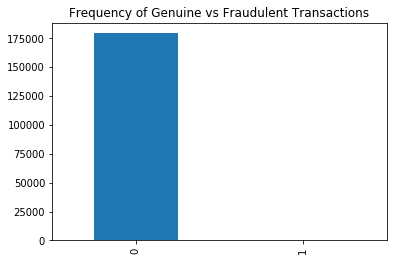

In [8]:
counts = pd.value_counts(data['Fraud'])

%matplotlib inline
print(counts)
counts.plot(kind="bar",
           title="Frequency of Genuine vs Fraudulent Transactions")

Why is this a problem?

## Transforming the data

**Data scientists make choices that impact model outputs. At Mastercard, data scientists are dealing with the same challenge: trying to reduce fraud based on limited datasets.**

To deal with the uneven number of fraud and genuine transactions, we could artificially increase the number of fraud transactions by creating similar transactions, or we could reduce the number of genuine transactions.

With more time, we might test multiple strategies. Today we'll reduce the number of genuine transactions.

<mark>Run the code, and look at the mean of the Class column. What does it mean? Modify number_genuine to change the number of genuine transactions that balance the classes, and re-run the code.</mark>

In [9]:
# How many genuine transactions should we use to balance the classes?
number_genuine = 492

# Separate genuine transactions and fraud
genuine = data[data['Fraud'] == 0].sample(number_genuine)
fraud = data[data['Fraud'] == 1]

# Combine fraud and genuine
even_data = pd.concat([genuine, fraud])

# Summarize our new dataset, even_data
even_data.describe()

,Fraud,Amount,Time,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,0.500000,105.625549,87772.773374,-2.329518,1.823507,-3.511732,2.259751,-1.621856,-0.701799,-2.758683,...,0.331004,0.181716,0.353095,-0.013729,-0.014311,-0.039749,0.014095,0.031061,0.087634,0.035255
std,0.500254,229.947832,48598.721123,5.541516,3.688949,6.223185,3.207252,4.181589,1.721862,5.873621,...,1.266603,1.106476,2.804156,1.171111,1.160439,0.546420,0.670117,0.475559,1.005875,0.419357
min,0.000000,0.000000,55.000000,-30.552380,-18.955081,-31.103685,-3.333103,-22.105532,-6.406267,-43.557242,...,-3.681904,-11.485230,-22.797604,-8.887017,-19.254328,-2.381726,-4.781606,-1.152671,-7.263482,-2.285577
25%,0.000000,1.417500,46166.250000,-2.752488,-0.148638,-5.113334,-0.126321,-1.903853,-1.536701,-3.044451,...,-0.389864,-0.191266,-0.182621,-0.562902,-0.236618,-0.382099,-0.308706,-0.283741,-0.065071,-0.059272
50%,0.500000,19.840000,79367.500000,-0.708867,0.959237,-1.385429,1.341077,-0.463951,-0.620498,-0.660534,...,0.215332,0.026022,0.150551,0.010270,-0.025073,0.002041,0.049648,-0.010831,0.046272,0.035133
75%,1.000000,99.990000,136068.750000,1.074926,2.798885,0.342011,4.235631,0.435895,0.042146,0.262865,...,0.940760,0.423209,0.645756,0.552176,0.204668,0.367388,0.384911,0.322036,0.455390,0.213326
max,1.000000,2125.870000,172700.000000,2.422508,22.057729,3.402585,12.114672,11.095089,6.474115,8.676152,...,5.228342,11.059004,27.202839,8.361985,5.466230,1.204431,2.208209,2.745261,3.052358,1.779364


Since we have a new dataset, we'll need to recreate our inputs, outputs, and split them into training and testing sets.

In [10]:
# Create inputs and outputs with new dataset
X = even_data.drop('Fraud', axis=1)
y = even_data['Fraud']

# Split new inputs and outputs into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# Train and score decision tree using new data
model = tree.DecisionTreeClassifier(max_depth = 4)
model = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8986486486486487

The last step is to visualize the decision tree we made. To do this, we've copied some code from the sklearn documentation.

<mark>Run the code below to see your tree!</mark>

In [ ]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=X.columns.values,  
                     class_names=["Genuine","Fraud"],  
                     filled=True, rounded=True, 
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

You might notice your decision tree is very small. The final step is to evaluate how complex your decision tree needs to be.

<mark>Go back <b>two</b> code cells and change the max_depth of your decsion tree (line 9). Run the code, then re-run the code to visualize the tree</mark>

<mark>What size of decision tree gets the greatest accuracy for your data? Why?</mark>

## Quantifying the investment

**Building good models requires time and resources; it is important to focus on valuable investments.**

How do you know your time was well spent?

There are huge costs associated with accepting a fraudlent transaction; [LexisNexis](https://risk.lexisnexis.com/insights-resources/research/2018-true-cost-of-fraud-study-for-the-retail-sector) finds fraud costs retailers an average of $2.94 per fraudulent dollar in fees, prevention, legal costs, etc. Declining a genuine transaction is costly too! [Ayden and 451 Research](https://go.adyen.com/rs/222-DNK-376/images/Retail%20Report%202019.pdf?mkt_tok=eyJpIjoiWXpNeE56Y3paRGszTnpBNSIsInQiOiJaVmJ1NXVJVkZFMkdHY1FCYVRGUENFemlDWnU3RSthM21LRmF3MDdtUldwSjZvMVF6ZzVjTTFjemJKS1BxZUJWWElxejZrQXVKeDhwNlZGVXkwT3FtcTkwd1BFTkwwaWZlV1BFcnM3YmY2aEQ1RnMrT3BFS1g4MTRsaWI3R1BUSSJ9) report 2 in 5 consumers have abandoned a purchase after a declined payment in the past 6 months. Customers are less likely to return to a merchant after a failed payment.

In our simulation, we'll charge $2.94 per dollar for each false approval and the cost of the transaction for each false decline. Of course, every situation is different, and a client will likely have their own costs associated with false approvals and declines.

<mark>Run the cell below to compare the cost of fraud when using your model with the cost of approving all transactions.</mark>

In [12]:
COST_PER_FRAUD_DOLLAR = 2.94 # Cost per dollar of a false approval
COST_PER_FALSE_DECLINE_DOLLAR = 1 # Cost per dollar of a false decline

predictions = list(model.predict(X_test))
truth = list(y_test)

false_approval_cost = 0
false_approval_num = 0
false_decline_cost = 0
false_decline_num = 0
correct_num = 0
correct_cost = 0

for i in range(len(predictions)):
    if predictions[i] != truth[i]: # If our prediction was wrong
        if truth[i] == 1: # If we falsely approved
            false_approval_cost += (X_test.iloc[i, 0] * COST_PER_FRAUD_DOLLAR) # Cost increases by $2.94 * the amount of the transaction
            false_approval_num += 1
        else: # If we falsely decline
            false_decline_cost += (X_test.iloc[i, 0] * COST_PER_FALSE_DECLINE_DOLLAR) # We miss a sale, cost increases by the amount of the transaction
            false_decline_num += 1
    else: # If our prediction was correct
        correct_num += 1
        if truth[i] == 0: # It's a genuine transaction
            correct_cost += X_test.iloc[i, 0]

print("You processed {} payments. {} were correct predictions, of which the genuine transactions totalled ${} in revenue.\n\nYou had {} false approvals, which cost ${} in fees and administrative costs.\nYou had {} false declines, which cost ${} in missed sales.\n".format(len(predictions), correct_num, round(correct_cost,2),  false_approval_num, round(false_approval_cost, 2), false_decline_num, round(false_decline_cost,2)))
print("{}% of your predictions were incorrect.\nYour loss due to fraud was {}% of revenue.\n".format(round((false_approval_num+false_decline_num)*100/len(predictions),2), round((false_approval_cost+false_decline_cost)/(false_approval_cost+false_decline_cost+correct_cost)*100,2)))

approve_all_cost = 0
approve_all_num = 0
all_genuine_cost = 0

for i in range(len(truth)):
    if truth[i] == 1: # There was fraud
        approve_all_cost += (X_test.iloc[i, 0] * COST_PER_FRAUD_DOLLAR)
        approve_all_num += 1
    else: # Genuine transaction
        all_genuine_cost += X_test.iloc[i, 0]

print("If you had simply approved all {} transactions, you would have falsely approved {} transactions, costing ${} while earning ${} in revenue.\n".format(len(predictions), approve_all_num, round(approve_all_cost, 2), round(all_genuine_cost, 2)))
print("Your model's predictions were worth ${}.".format(round(((correct_cost - false_decline_cost - false_approval_cost)-(all_genuine_cost - approve_all_cost)),2)))

You processed 296 payments. 266 were correct predictions, of which the genuine transactions totalled $12534.45 in revenue.

You had 24 false approvals, which cost $10693.63 in fees and administrative costs.
You had 6 false declines, which cost $306.31 in missed sales.

10.14% of your predictions were incorrect.
Your loss due to fraud was 46.74% of revenue.

If you had simply approved all 296 transactions, you would have falsely approved 161 transactions, costing $48026.84 while earning $12840.76 in revenue.

Your model's predictions were worth $36720.59.


<mark>What differs in our simulation when compared to reality?</mark>

<mark>What could make our model stronger?</mark>